# Plantilla de Regresión 

## Importar bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importar el dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values # en este caso es lo mismo que dataset.iloc[:, 1].values *pero* lo dejamos así para que sea una matriz (2D) y no un vector (1D).
# La matriz de características siempre necesita una "matriz"
y = dataset.iloc[:, -1].values # en este caso es lo mismo que dataset.iloc[:, 2].values

In [3]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


## Dividir el data set en conjunto de entrenamiento y conjunto de testing

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# x= variable independiente
# y= variable dependiente
# test_size =0.2 eserva ~20% de las filas para test y ~80% para train (redondea a un entero según el tamaño del dataset)
# random_state=0 → fija la semilla del aleatorizador para que la misma partición se repita cada vez que ejecutes el código (reproducibilidad).
# Devuelve:
# X_train y y_train: datos para entrenar el modelo
# X_test y y_test: datos nunca vistos que usarás para evaluar el modelo.
# En clasificación, añade stratify=y para mantener la misma proporción de clases en train y test:

## Escalado de variables

In [5]:
#Escalado de variables

# Estandarizamos los valores para que tengan media 0 y desviación estándar 1. Valores entre -1 y 1
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(X_train)  # Ajustamos y transformamos las características numéricas del conjunto de entrenamiento
X_test= sc.transform(X_test)  # Transformamos el conjunto de prueba usando el ajuste del conjunto de entrenamiento
print("Conjunto de entrenamiento después del escalado de características:")
print(X_train)
print("Conjunto de prueba después del escalado de características:")
print(X_test)

Conjunto de entrenamiento después del escalado de características:
[[-0.13271219]
 [ 1.63678363]
 [-1.19440968]
 [ 0.57508614]
 [ 0.92898531]
 [-0.48661135]
 [-1.54830884]
 [ 0.22118698]]
Conjunto de prueba después del escalado de características:
[[-0.84051051]
 [ 1.28288447]]


No hacemos escalado porque queremos ver cómo se transforma esta relación en una ecuación no lineal

## Ajustar la Regresión Lineal simple con TODO el dataset

In [24]:
# Incluir aquí nuestro modelo de regresión

In [25]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y) # Toda la X

LinearRegression()

## Ajustar la Regresión Lineal Polinómica con TODO el dataset

In [7]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4) # por defecto degree=2 (grado del polinomio)
X_poly = poly_reg.fit_transform(X) # 1º hacemos la Transformación polinómica
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y) # aplicamos la regresión lineal sobre la transformación polinómica

LinearRegression()

## Predicción de resultados con Regresión Linear

In [8]:
lin_reg.predict([[6.5]])

array([330378.78787879])

## Predicción resultado con Regresión Polinómica

In [9]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265152])

## Visualización de los resultados del Modelo Lineal

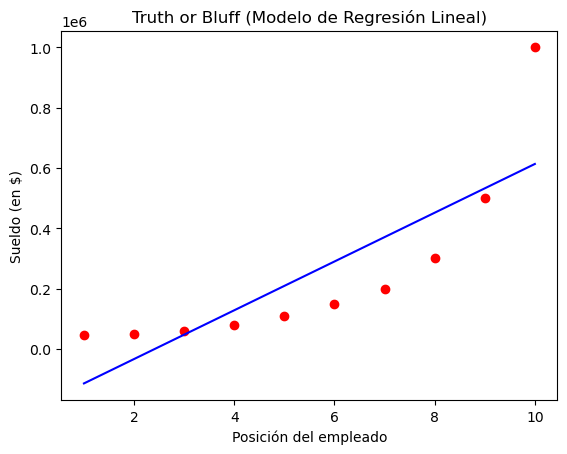

In [10]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Modelo de Regresión Lineal)')
plt.xlabel('Posición del empleado')
plt.ylabel('Sueldo (en $)')
plt.show()

No tiene ningún sentido. No se adapta y en posición 1 el sueldo sería negativo, Los altos cargos están absolutamente fuera

## Visualización de los resultados del modelo Polinómico

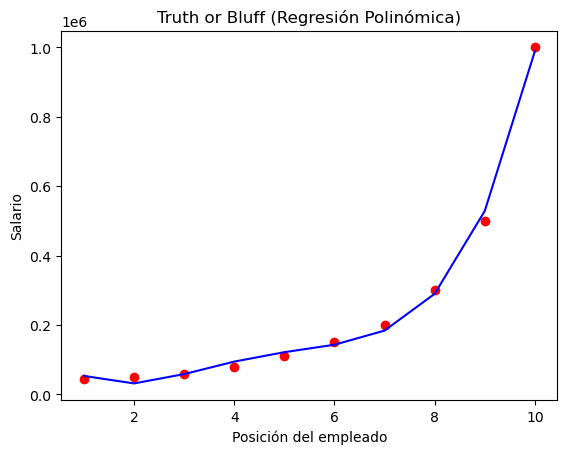

In [11]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue') # podría haber puesto X_poly
plt.title('Truth or Bluff (Regresión Polinómica)')
plt.xlabel('Posición del empleado')
plt.ylabel('Salario')
plt.show()

## Visualización de los resultados de la regresión polinómica (Mejor resolución y curva más suave)

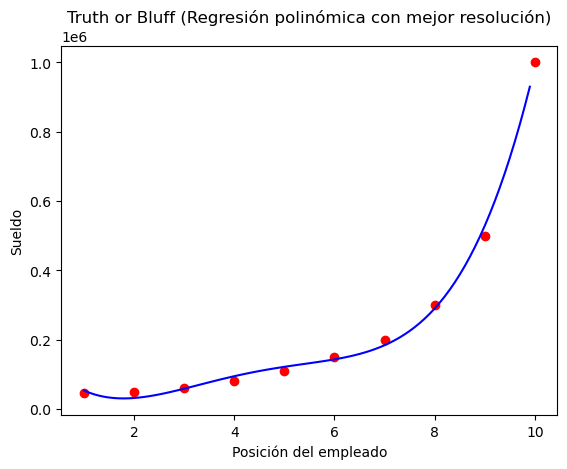

In [12]:
X_grid = np.arange(min(X), max(X), 0.1) # crea secuencia entre el mínimo y máximo con el salto indicado
X_grid = X_grid.reshape((len(X_grid), 1)) #como estaba en vector fila. redimensionamos a vector columna: 1 columna sy filas con el tamñao de X_grid
                                          # Antes "shape" estaba como (90,) y ahora como (90,1)
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Regresión polinómica con mejor resolución)')
plt.xlabel('Posición del empleado')
plt.ylabel('Sueldo')
plt.show()

## Predicción de resesultado con Regresión Linear

In [22]:
y_pred1 = lin_reg.predict([[6.5]])

## Predicción resultado con Regresión Polinómica

In [23]:
y_pred2 = lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

## Visualización de los resultados del Modelo Lineal

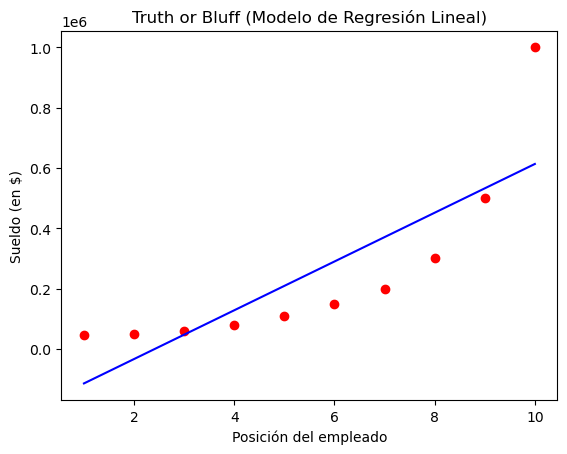

In [17]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Modelo de Regresión Lineal)')
plt.xlabel('Posición del empleado')
plt.ylabel('Sueldo (en $)')
plt.show()

No tiene ningún sentido. No se adapta y en posición 1 el sueldo sería negativo, Los altos cargos están absolutamente fuera

## Visualización de los resultados del modelo Polinómico

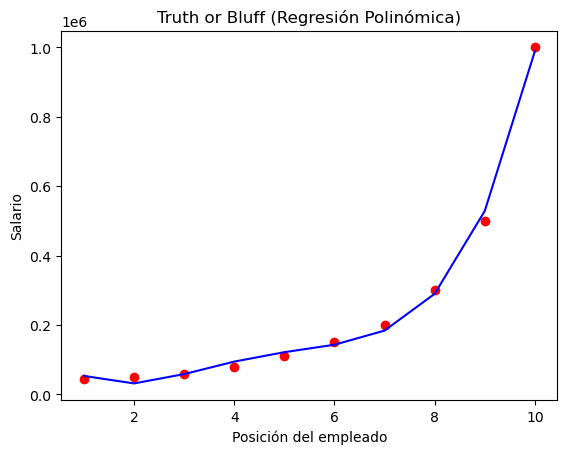

In [18]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue') # podría haber puesto X_poly
plt.title('Truth or Bluff (Regresión Polinómica)')
plt.xlabel('Posición del empleado')
plt.ylabel('Salario')
plt.show()

## Visualización de los resultados de la regresión polinómica (Mejor resolución y curva más suave)

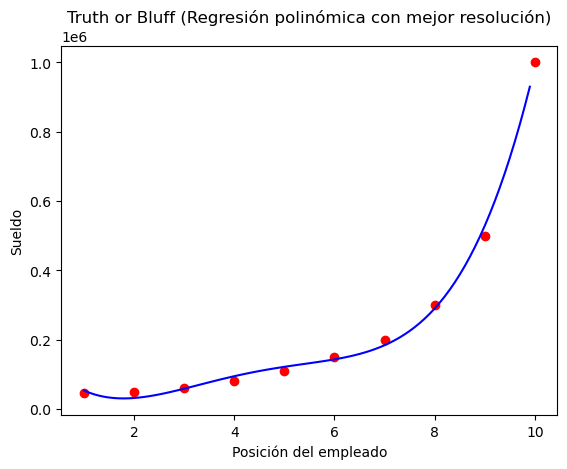

In [19]:
X_grid = np.arange(min(X), max(X), 0.1) # crea secuencia entre el mínimo y máximo con el salto indicado
X_grid = X_grid.reshape((len(X_grid), 1)) #como estaba en vector fila. redimensionamos a vector columna: 1 columna sy filas con el tamñao de X_grid
                                          # Antes "shape" estaba como (90,) y ahora como (90,1)
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Regresión polinómica con mejor resolución)')
plt.xlabel('Posición del empleado')
plt.ylabel('Sueldo')
plt.show()